# 微分方程式

## 微分方程式を解く

In [1]:
# 微分方程式を作成するために、Eq とFunction をインポートする
from sympy import init_printing, symbols, Eq, Function
from sympy.plotting import plot

init_printing(use_latex='mathjax')

In [2]:
t = symbols('t', real=True)
# x をFunction としてインスタンス化
x = Function('x')

# Eq(左辺, 右辺) を使用して微分方程式diffeq を作成
diffeq = Eq(x(t).diff(t), -x(t))
diffeq

d               
──(x(t)) = -x(t)
dt              

In [3]:
# 微分方程式を解くためにdsolve をインポートする
from sympy import dsolve

gen_sol_1 = dsolve(diffeq, x(t))
gen_sol_1

           -t
x(t) = C₁⋅ℯ  

In [4]:
from sympy import solveset

# 初期状態t0, x0 とそのときのC1
t0, x0 = symbols('t0 x0', real=True)
C1 = symbols('C1')

# 初期条件からC_1 を計算
C_1 = solveset(gen_sol_1.subs([(t, t0), (x(t0), x0)]), C1)

# 解はargs プロパティにアクセスして取得
C_1.args[0]

    t₀
x₀⋅ℯ  

In [5]:
# subs メソッドで初期条件から求めたC_1 を代入
par_sol_1 = gen_sol_1.subs(C1, C_1.args[0])
par_sol_1

           -t  t₀
x(t) = x₀⋅ℯ  ⋅ℯ  

## 運動方程式を解く

### 自由落下

In [6]:
# 自由落下の運動方程式
m, g = symbols('m g', real=True, positive=True)
eom_free_fall = Eq(m*x(t).diff(t, 2), -m*g)
eom_free_fall

    2             
   d              
m⋅───(x(t)) = -g⋅m
    2             
  dt              

In [7]:
gen_sol_2 = dsolve(eom_free_fall, x(t))
gen_sol_2

                      2
                   g⋅t 
x(t) = C₁ + C₂⋅t - ────
                    2  

In [8]:
diff_gen_sol_2 = Eq(gen_sol_2.lhs.diff(t), gen_sol_2.rhs.diff(t))
diff_gen_sol_2

d                  
──(x(t)) = C₂ - g⋅t
dt                 

In [9]:
# 初期条件からC1 とC2 を求める
from sympy import linsolve
C2, h = symbols('C2 h')

# 連立方程式を解く
C_2 = linsolve([gen_sol_2, diff_gen_sol_2], (C1, C2))
# 連立方程式の解に初期条件を代入
C_2 = C_2.subs([(x(t).diff(t), 0), (t, 0), (x(0), h)])
C_2 = [(C1, C_2.args[0][0]), (C2, C_2.args[0][1])]
C_2

[(C₁, h), (C₂, 0)]

In [10]:
par_sol_2 = gen_sol_2.subs(C_2)
par_sol_2

            2    
         g⋅t     
x(t) = - ──── + h
          2      

In [11]:
# ics に辞書型で初期条件を与える
dsolve(eom_free_fall, x(t),
        ics={x(0):h, x(t).diff(t).subs(t, 0): 0})

            2    
         g⋅t     
x(t) = - ──── + h
          2      

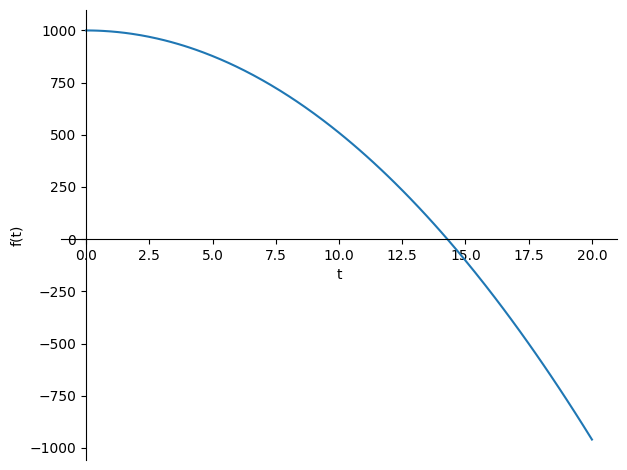

In [12]:
# プロットの作成
const_free_fall = [(g, 9.8), (h, 1000)]
plot(par_sol_2.rhs.subs(const_free_fall), (t, 0, 20))

### 自由落下（空気抵抗あり）

In [13]:
D = symbols('D', real=True, positive=True)

# 運動方程式を入力
eom_free_fall_w_res = Eq(m*x(t).diff(t, 2), -m*g - D*x(t).diff(t))
eom_free_fall_w_res

    2                           
   d              d             
m⋅───(x(t)) = - D⋅──(x(t)) - g⋅m
    2             dt            
  dt                            

In [14]:
from sympy import simplify
# 一般解の計算
gen_sol_3 = dsolve(eom_free_fall_w_res, x(t))
gen_sol_3

                -D⋅t         
                ─────        
                  m     g⋅m⋅t
x(t) = C₁ + C₂⋅ℯ      - ─────
                          D  

In [15]:
from sympy import simplify
# 特殊解の計算
par_sol_3 = dsolve(eom_free_fall_w_res, x(t),
                ics={x(0):h, x(t).diff(t).subs(t, 0):0})
simplify(par_sol_3)

                                -D⋅t 
                                ─────
                      2      2    m  
           g⋅m⋅t   g⋅m    g⋅m ⋅ℯ     
x(t) = h - ───── + ──── - ───────────
             D       2          2    
                    D          D     

In [16]:
# 右辺はrhs プロパティを使用する
par_sol_3.rhs.diff(t)

             -D⋅t 
             ─────
               m  
  g⋅m   g⋅m⋅ℯ     
- ─── + ──────────
   D        D     

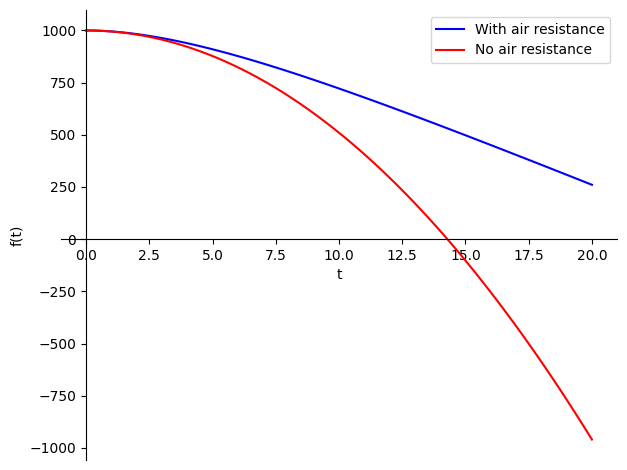

In [17]:
# 各定数
const_free_fall_res = [(g, 9.8), (h, 1000), (D, 0.2), (m, 1)]

# プロットの作成
p = plot(par_sol_3.rhs.subs(const_free_fall_res),
        par_sol_2.rhs.subs(const_free_fall),
        (t, 0, 20), show=False, legend=True)
# 凡例の設定
p[0].label = 'With air resistance' # 空気抵抗あり
p[1].label = 'No air resistance' # 空気抵抗なし

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

### バネによる振動

In [18]:
# 正の実数である定数k の作成
k = symbols('k', real=True, positive=True)
# 初期条件の定数の作成
v0, x0 = symbols('v0 x0', real=True)

# 運動方程式を入力
eom_simp_hosc = Eq(m*x(t).diff(t, 2), -k*x(t))
eom_simp_hosc

    2                
   d                 
m⋅───(x(t)) = -k⋅x(t)
    2                
  dt                 

In [19]:
# 一般解の計算
gen_sol_4 = dsolve(eom_simp_hosc, x(t))
gen_sol_4

             ⎛√k⋅t⎞         ⎛√k⋅t⎞
x(t) = C₁⋅sin⎜────⎟ + C₂⋅cos⎜────⎟
             ⎝ √m ⎠         ⎝ √m ⎠

In [20]:
# 特殊解の計算
par_sol_4 = dsolve(eom_simp_hosc, x(t),
                ics={x(0):x0, x(t).diff(t).subs(t, 0):v0})
par_sol_4

                               ⎛√k⋅t⎞
                      √m⋅v₀⋅sin⎜────⎟
             ⎛√k⋅t⎞            ⎝ √m ⎠
x(t) = x₀⋅cos⎜────⎟ + ───────────────
             ⎝ √m ⎠          √k      

In [21]:
w_0 = symbols('\omega_0', real=True, positive=True)
par_sol_4_omega = par_sol_4.subs(k, m*w_0**2)
par_sol_4_omega

                           v₀⋅sin(\omega₀⋅t)
x(t) = x₀⋅cos(\omega₀⋅t) + ─────────────────
                                \omega₀     

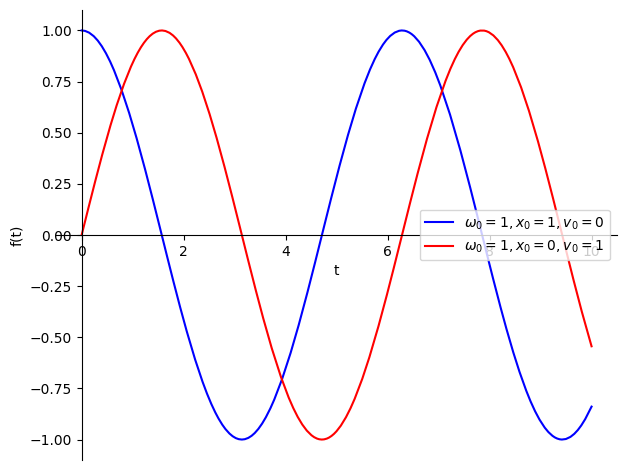

In [22]:
# 定数の設定
const_simp_hosc = [[(w_0, 1), (x0, 1), (v0, 0)],
                [(w_0, 1), (x0, 0), (v0, 1)]]
# プロットの作成
p = plot(par_sol_4_omega.rhs.subs(const_simp_hosc[0]),
            par_sol_4_omega.rhs.subs(const_simp_hosc[1]),
            (t, 0, 10), legend=True, show=False)

p[0].label = '$\omega_0=1, x_0=1, v_0=0$'
p[1].label = '$\omega_0=1, x_0=0, v_0=1$'
p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

# 4 生物の増減を解く

### ロジスティック方程式

In [23]:
# 定数の作成
a, K = symbols('a K', real=True)
# 人口p(t)
p = symbols('p', cls=Function, real=True)
# ロジスティック方程式の入力
logistic_eq = Eq(p(t).diff(t), a*p(t)*(1-p(t)/K))
logistic_eq

d            ⎛    p(t)⎞     
──(p(t)) = a⋅⎜1 - ────⎟⋅p(t)
dt           ⎝     K  ⎠     

In [24]:
solveset(logistic_eq.rhs, p(t))

{0, K}

In [25]:
gen_sol_logistic = dsolve(logistic_eq, p(t))
gen_sol_logistic

           C₁⋅K + a⋅t 
        K⋅ℯ           
p(t) = ───────────────
        C₁⋅K + a⋅t    
       ℯ           - 1

In [26]:
# 一般解の計算
gen_sol_logistic = dsolve(logistic_eq, p(t))
gen_sol_logistic

           C₁⋅K + a⋅t 
        K⋅ℯ           
p(t) = ───────────────
        C₁⋅K + a⋅t    
       ℯ           - 1

In [27]:
# 人口初期値p0
p0 = symbols('p0', positive=True)
# 特殊解の計算
par_sol_logistic = dsolve(logistic_eq, p(t),
                            ics={p(t0):p0})
par_sol_logistic

                    a⋅t  -a⋅t₀       
              K⋅p₀⋅ℯ   ⋅ℯ            
p(t) = ──────────────────────────────
                 ⎛    a⋅t  -a⋅t₀    ⎞
                 ⎜p₀⋅ℯ   ⋅ℯ         ⎟
       (-K + p₀)⋅⎜────────────── - 1⎟
                 ⎝   -K + p₀        ⎠

In [28]:
from sympy import limit, oo
# a には正の値を代入して極限値を計算
limit(par_sol_logistic.rhs.subs(a, 0.1), t, oo)

K

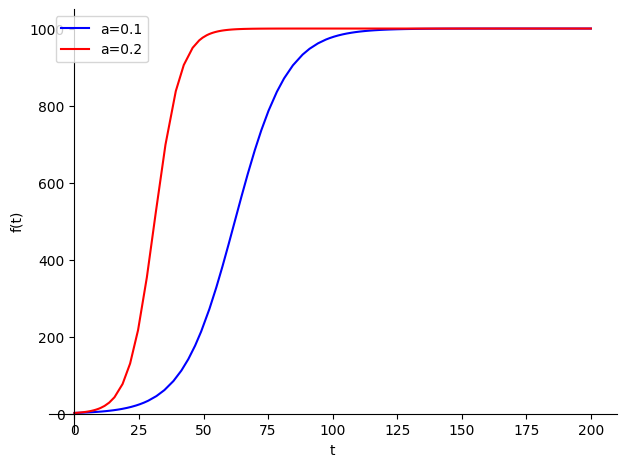

In [29]:
# 定数の設定
const_logistic = [{t0:0, p0:2, a:0.1, K:1000},
                {t0:0, p0:2, a:0.2, K:1000}]
# プロットの作成
p = plot(par_sol_logistic.rhs.subs(const_logistic[0]),
         par_sol_logistic.rhs.subs(const_logistic[1]),
(t, 0, 200), legend=True, show=False)
# 凡例の設定
p[0].label = 'a=0.1'
p[1].label = 'a=0.2'

p[0].line_color = 'b'
p[1].line_color = 'r'

p.show()

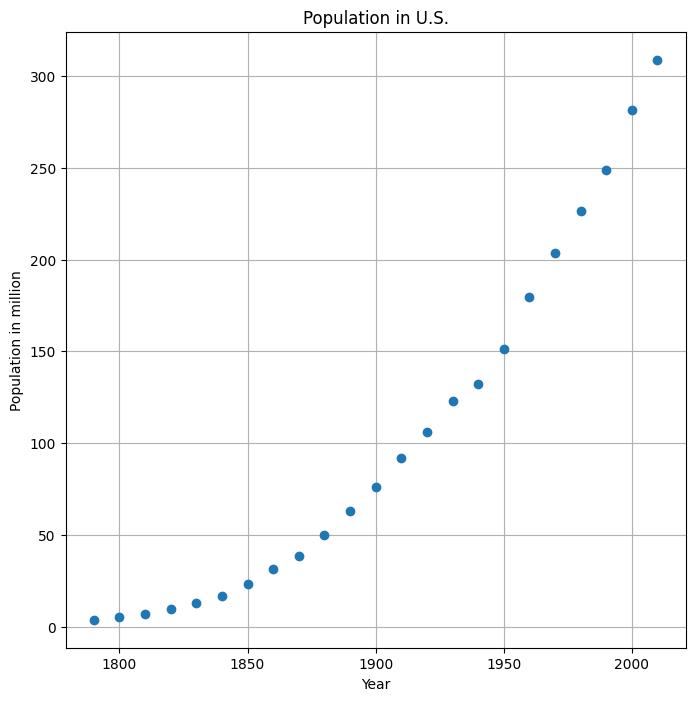

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# アメリカの人口データの読み込み
data_us_population = np.loadtxt('../data/us_population.csv',
                                delimiter=',')

year = data_us_population[:,0]
us_pop = data_us_population[:,1] / 1000 # 百万人単位に変換

# プロットエリアの作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# プロットの作成
ax.plot(year, us_pop, marker='o', linestyle='None')
ax.set_title('Population in U.S.')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')
ax.grid()

plt.show()

In [31]:
from scipy.optimize import curve_fit
from sympy import lambdify
# 初期条件
initial_val_logistc = {t0:year[0], p0:us_pop[0]}

# フィッティング用の関数f の作成
f = lambdify((t,a,K),
            par_sol_logistic.rhs.subs(initial_val_logistc))

In [32]:
# curve_fit を使用してフィッティングを実施
param, cov = curve_fit(f, year, us_pop, p0=[0.05, 400])

In [33]:
{a: param[0], K: param[1]}

{K: 369.55288861881866, a: 0.02678890641806669}

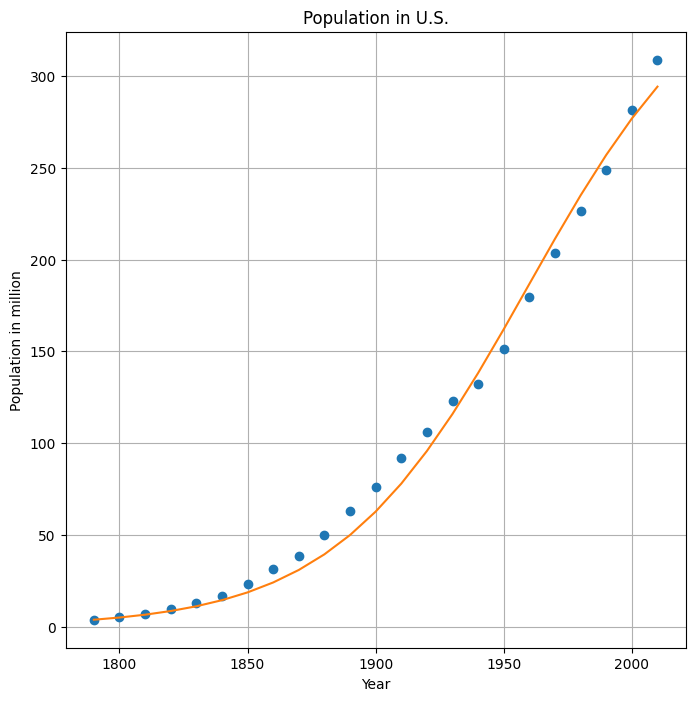

In [34]:
# フィッティング結果の確認
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.plot(year, us_pop, marker='o', linestyle='None')
ax.plot(year, f(year, param[0], param[1]))
ax.set_title('Population in U.S.')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')
ax.grid()

plt.show()